In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#definindo nomes das colunas

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

#salvando dados em data frame

data = pd.read_csv('./iris.data', names=cols)

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#renomear as espécies para retirar a parte "Iris-" do nome para melhorar distinção entre cada uma das espécies
data['species'] = data['species'].map({'Iris-setosa': 'setosa', 'Iris-virginica': 'virginica', 'Iris-versicolor' : 'versicolor'})
#visualizar a alteração
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#checando tipos de dados de cada coluna e possíveis dados faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#medidas de cada coluna dos dados
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checando tamanho do grupo de cada espécie
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
#dividir grupos de teste e treino
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
#checar tamanho das classes no grupo de treino
train.groupby('species').size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

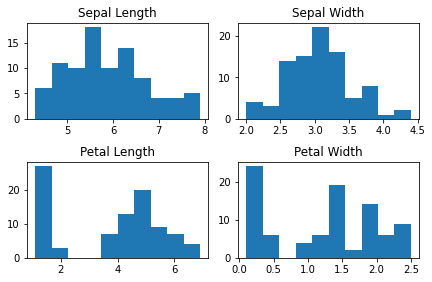

In [9]:
#histogramas para ver a distribuição dos dados de cada coluna
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=1.0);

#percebe-se que os dados das sépalas são muito mais "misturados" que das pétalas, portanto, o segundo grupo é a chave para
#fazer uma classificação com maior chance de acerto

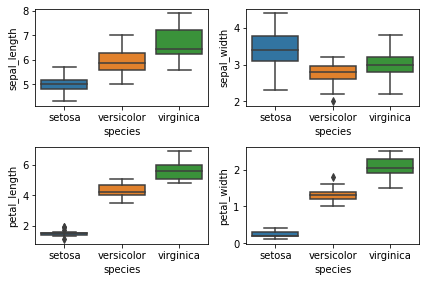

In [10]:
#utilizando boxplots para ter outra visão da distribuição dos dados
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);

fig.tight_layout(pad=1.0);
#novamente, é possível ver que os dados de sépalas são mais misturados enquanto os de pétalas tem uma divisão mais clara

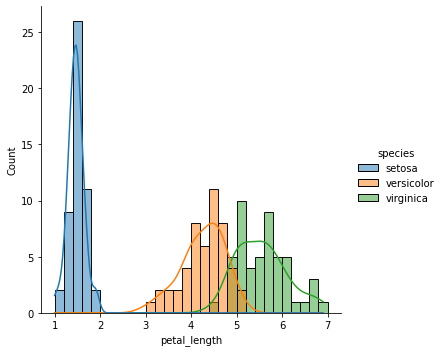

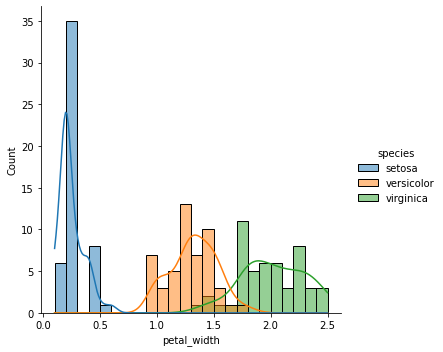

In [11]:
#histogramas de pétalas com mais detalhes
#primeiro, comprimento, segundo, largura
ax1 = sns.displot(data=data, x='petal_length', hue='species', kde=True, binwidth=0.2)
ax1.set_titles('Petal Length By Species')

ax2 = sns.displot(data=data, x='petal_width', hue='species', kde=True, binwidth=0.1)
ax2.set_titles('Petal Width By Species')

#para a espécie setosa, ela se diferencia muito mais das outras duas. a virginica e a versicolor são mais semelhantes, mas ainda
#é possível criar uma divisão relativamente clara entre elas

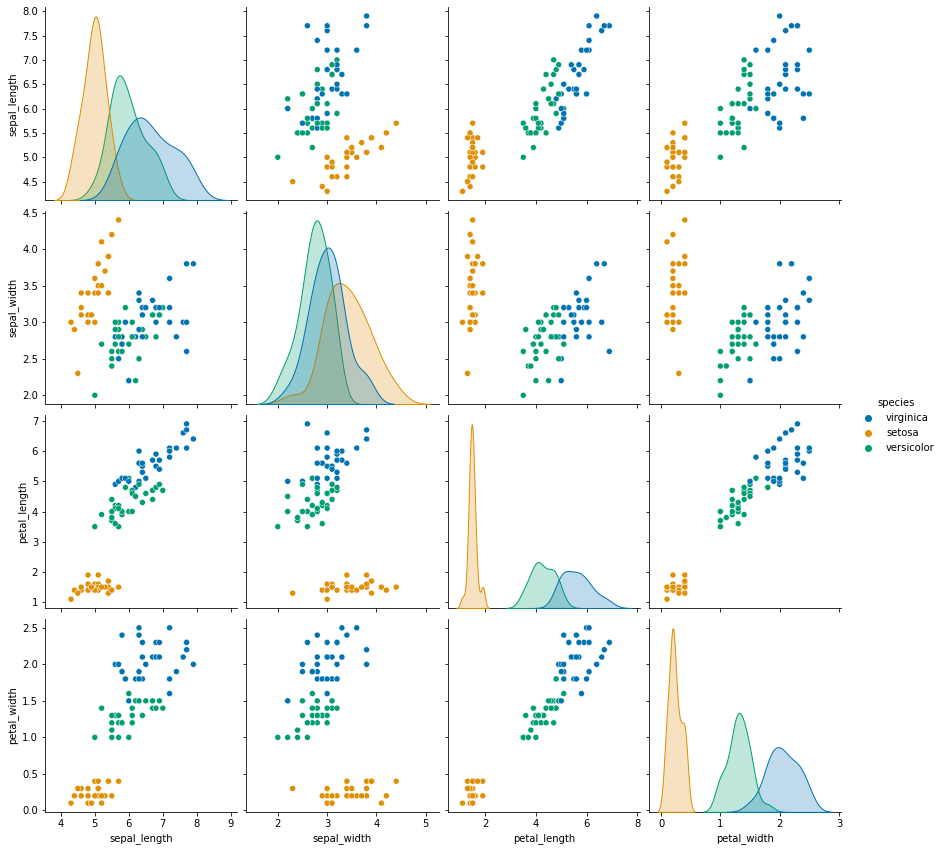

In [12]:
#novamente, para ter mais um ponto de vista da distribuição dos dados, usando pairplot, que une scatterplot para os pares
#e histogramas com kde para a diagonal principal
sns.pairplot(train, hue="species", height = 3, palette = 'colorblind');

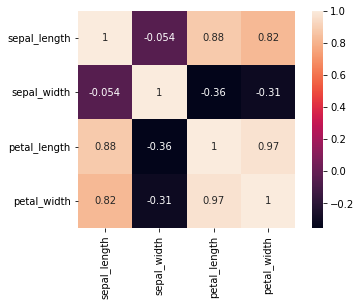

In [13]:
#utilizndo mapa de calor para determinar como as variáveis se relacionam
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);
#é possível ver que as medidas das pétalas são bastante correlacionadas enquanto as sépalas não são

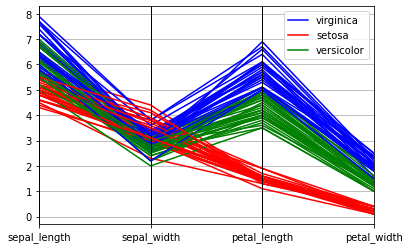

In [14]:
#visualização de coordenadas paralelas
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);
#novamente, conseguimos ver uma clara separação entre os dados de pétalas enquanto as sépalas não se separam

In [15]:
#separando os valores das labels
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [16]:
#modelo de regressão linear
trainLReg = train.copy()
testLReg = test.copy()

#como o modelo só aceita parâmetros em formato de float, tive que alterar as labels das espécies por números
trainLReg['species'] = train['species'].map({'setosa': 0, 'virginica': 1, 'versicolor' : 2})
testLReg['species'] = test['species'].map({'setosa': 0, 'virginica': 1, 'versicolor' : 2})

X_train_LR = trainLReg[['sepal_length','sepal_width','petal_length','petal_width']]
y_train_LR = trainLReg.species
X_test_LR = testLReg[['sepal_length','sepal_width','petal_length','petal_width']]
y_test_LR = testLReg.species

lin_reg = LinearRegression().fit(X_train_LR, y_train_LR)

print(lin_reg.coef_)
print(lin_reg.intercept_)
print(lin_reg.score(X_train_LR,y_train_LR))
print(lin_reg.score(X_test_LR,y_test_LR))

#o score com o conjunto de testes se mostrou bem baixo. isso possivelmente se deu por uma falta de tratamento nos dados
#talvez utilizar one hot encoding funcionasse melhor do que simplesmente substituir as labels das espécies. utilizar apenas 
#dados das pétalas possivelmente aumentaria o score também

[-0.06231022 -0.6678365   0.52109024 -0.62110088]
2.1779135385354795
0.5863846718702154
0.5388019292718458


In [17]:
#modelo de árvore de decisões
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print(metrics.accuracy_score(prediction,y_test))
mod_dt.feature_importances_
#com a função feature_importances_ percebe que o modelo percebe-se que a importância das medidas das sépalas foi nula, ou seja,
#não foram utilizadas para construir a árvore

0.9833333333333333


array([0.        , 0.        , 0.42430866, 0.57569134])

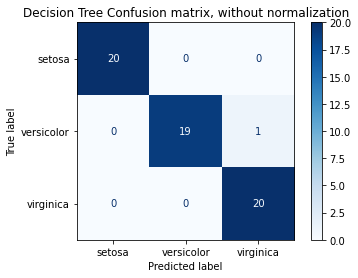

In [18]:
#matriz de confusão
disp = ConfusionMatrixDisplay.from_estimator(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');
#a matriz serve para mostrar a classificação obtida e a esperada da árvore. pode-se ver que houve apenas um caso incorreto

In [19]:
#classificador naive bayes
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9333333333333333


In [20]:
#classificador de naive bayes com apenas duas variáveis
selected_predictors = ["petal_length", "petal_width"]
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print(metrics.accuracy_score(y_pred,y_test))

0.95


In [21]:
#análise discriminante linear(LDA)
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9833333333333333


In [22]:
#LDA com apenas duas variáveis 
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print(metrics.accuracy_score(y_pred,y_test))

0.9333333333333333


In [23]:
#análise discriminante quadrática(QDA)
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9833333333333333


In [24]:
#QDA com apenas duas variáveis
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print(metrics.accuracy_score(y_pred,y_test))
#curiosamente tanto o LDA quanto QDA tem uma perda de performance quando o utiliza apenas as medidas das pétalas em consideração

0.9666666666666667


In [25]:
#regressão logística
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=mod_lr.predict(X_test)
print(metrics.accuracy_score(prediction,y_test))
#pode-se ver que todos os outros métodos, inclusive os lineares, demonstraram uma performance muito superior à regressão linear.
#provavelmente os dados não foram tratados corretamente para se adequarem ao modelo da regressão linear

0.95
